In [45]:
import numpy as np
np.random.seed(99999)
target_distr = np.random.rand(2)

target_distr /= sum(target_distr)

In [46]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

def get_var_form(params):
    qr = QuantumRegister(1, name="qr")
    cr = ClassicalRegister(1, name="cr")
    qc = QuantumCircuit(qr, cr)
    qc.u3(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc

In [47]:
from qiskit import Aer, execute
backend = Aer.get_backend("qasm_simulator")
NUM_SHOTS=10000

In [48]:
def get_probability_distribution(counts):
    output_distr = [v/NUM_SHOTS for v in counts.values()]
    if len(output_distr) == 1:
        output_distr.append(1- output_distr[0])
    return output_distr

def objective_function(params):
    qc = get_var_form(params)
    result = execute(qc, backend, shots=NUM_SHOTS).result()
    output_distr = get_probability_distribution(result.get_counts(qc))
#     output_distr = get_probability_distribution(result.get_counts(qc))
    # Calculate the cost as the distance between the output distribution and the target distribution
    cost = sum([np.abs(output_distr[i] - target_distr[i]) for i in range(2)])
    return cost

In [49]:
from qiskit.aqua.components.optimizers import COBYLA

optimizer = COBYLA(maxiter=500, tol=0.0001)

params = np.random.rand(3)
ret = optimizer.optimize(num_vars=3, objective_function=objective_function, initial_point=params)

qc = get_var_form(ret[0])
counts = execute(qc, backend, shots=NUM_SHOTS).result().get_counts(qc)
output_distr = get_probability_distribution(counts)

print("Target distribution: ", target_distr)
print("Obtained Distribution: ", output_distr)
print("Output Error(Manhattan Distance): ", ret[1])
print("Parameter Found: ", ret[0])

<ipython-input-46-594fbd817f15>:7: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(params[0], params[1], params[2], qr[0])


Target distribution:  [0.17324365 0.82675635]
Obtained Distribution:  [0.1718, 0.8282]
Output Error(Manhattan Distance):  0.024087302259190757
Parameter Found:  [3.9912974  2.36369556 0.30627643]


=============Linear Entanglement:=============


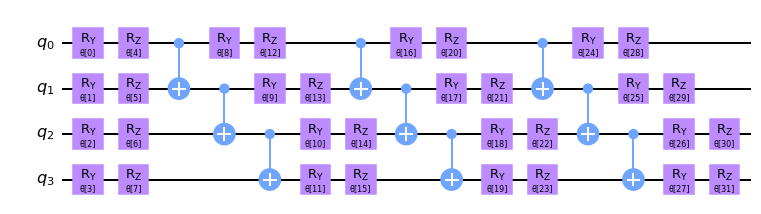


=============Full Entanglement:=============


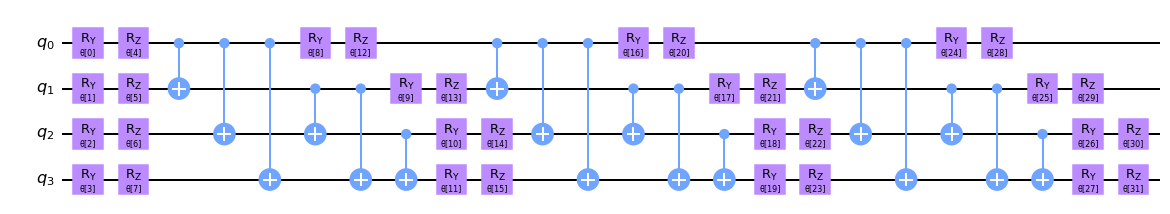

In [53]:
from qiskit.circuit.library import EfficientSU2
entanglements = ["linear", "full"]
for entanglement in entanglements:
    form = EfficientSU2(num_qubits=4, entanglement=entanglement)
    if entanglement == "linear":
        print("=============Linear Entanglement:=============")
    else:
        print("=============Full Entanglement:=============")
    # We initialize all parameters to 0 for this demonstration
    display(form.draw(output="mpl", fold=100))
    print()